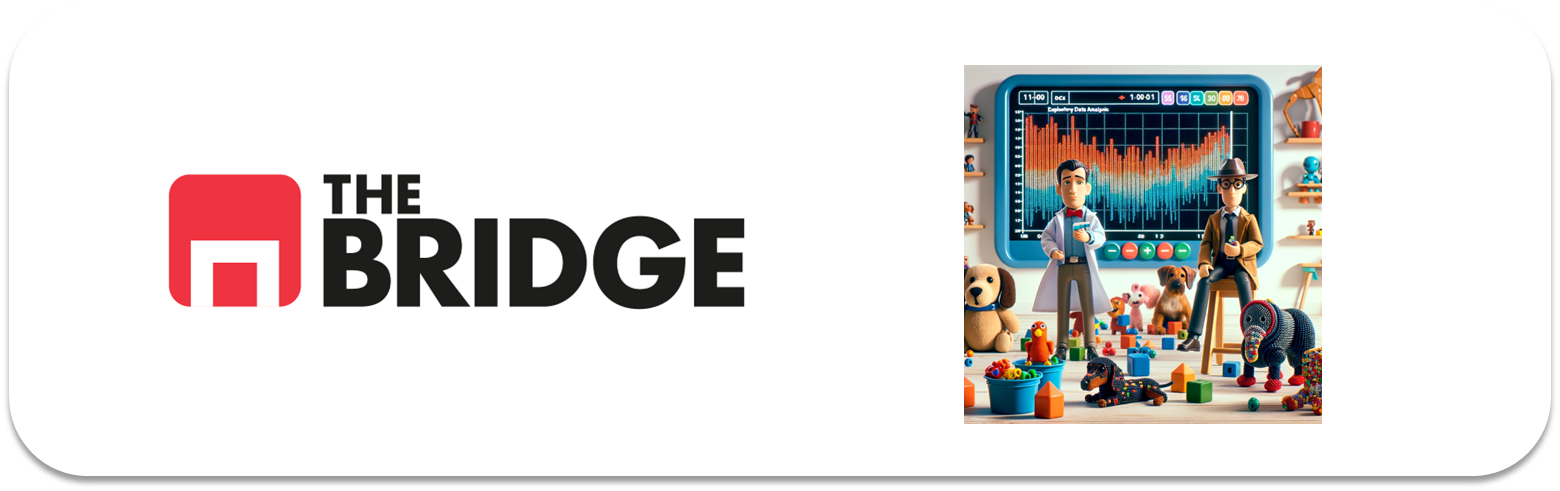

## Análisis de Datos (Bivariante): Solo categóricas

Es hora de ver si existe alguna relación entre las columnas o variables de nuestro dataset, relación que puede no existir (variables independientes), existir e indicar que las variables cambian más o menos al mismo tiempo (pero no necesariamente en el mismo sentido), situación que llamaremos correlación, y finalmente que haya una relación de cuasalidad (cuando una cambia conlleva que otra cambie como consecuencia de esto)

En esta sesión en nos vamos a centrar en el análisis de relación entre dos variables categóricas.

En este tipo de análisis nos vamos a apoyar mucho en la parte visual y hasta cierto punto en la matemática con el concepto de correlación, su cálculo y el test de hipótesis asociado a esta. Pero ahora nos centramos en el análisis visual y lo vamos a hacer trabajando directamente con nuestros datasets y casos de uso de la unidad anterior. Por eso, ejecuta las celdas siguientes:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from bootcampviztools import plot_categorical_relationship_fin, pinta_distribucion_categoricas # Este módulo lo tienes en el directorio de los notebooks, puede abrirlo y jugar con las funciones que contiene

df_seguros = pd.read_csv("./data/Marketing-Customer-Analysis.csv")
df_air_jun = pd.read_csv("./data/dataset_viajes_jun23.csv")

### Analisis Bivariante con 2 variables categóricas

*ANTES DE EMPEZAR: Las gráficas que vamos a emplear son sugerencias sencillas para hacer casi cualquier análisis pero sin duda puede que te resulte útil algún tipo de visualización para el análisis, por eso este [SITIO CURRADISIMO](https://www.data-to-viz.com/) puede ayudarte. Volveremos a él en el sprint de visualización*

A la hora de hacer el análisis bivariante mi propuesta es comenzar por una análisis visual. ¿Y qué grafica?.... Sí, ya lo sabes, depende... Pero en este caso es fácil depende de la cardinalidad de las variables que tengamos entre manos (recuerda que son 2 categóricas en esta sección).

Entremos ya en materia con nuestros casos de uso y te muestro algunos ejemplos para que luego puedas usar el que te apetezca en tu trabajo.

#### Caso 1. Seguros: Bivariante response-state

Nos han pedido que estudiemos la respuesta a las campañas de marketing según la demografía por eso un conjunto de analisis que tenemos que hacer sí o sí es el de la variable/columna `response` con todas las que consideremos demográficas, por ejeplo: `state`, `education`,`marital_status`,`gender`,`eploymentstatus`. Nosotros vamos a hacer el análisis de relación con `state` como ejemplo.

**#1  Comparar sus frecuencias** tal como las obtuvimos en el univariante

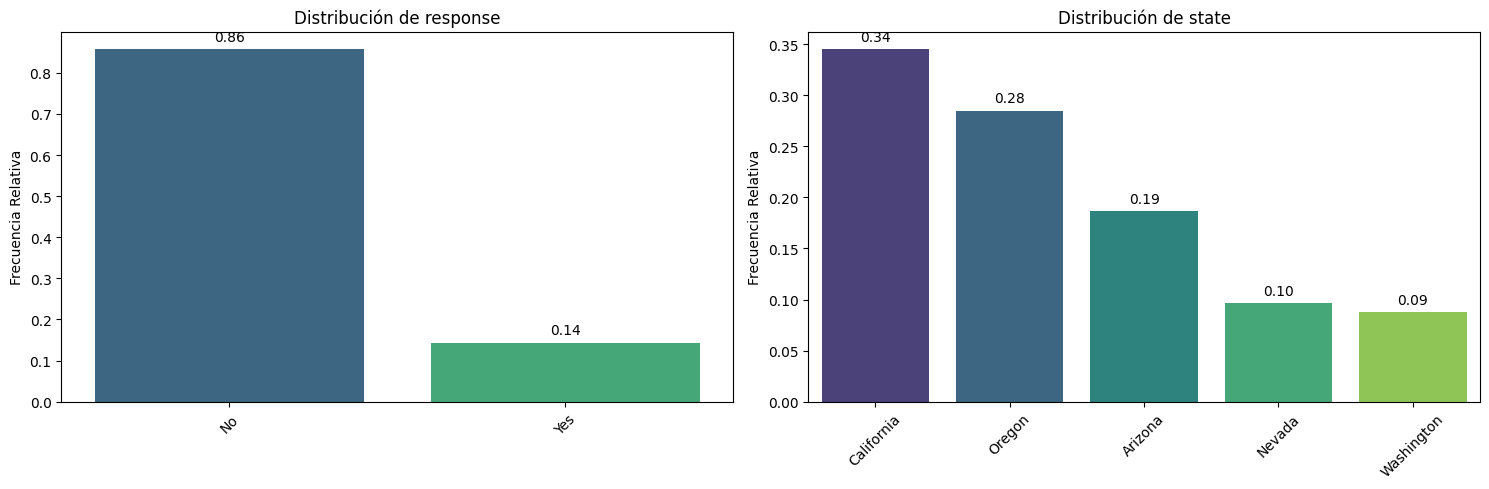

In [2]:
pinta_distribucion_categoricas(df_seguros,["response","state"], relativa= True, mostrar_valores= True)

Así, antes de "combinarlas", lo que espero es que, si no hay interacción o relación entre ellas. En concreto, como "response" es la variable directora, es la que quiero ver en función de la otra, y por tanto lo que yo quiero ver es si hay variación de la distribución de "YES"/"NO" por estado. Por eso mira como lo muestro:

**#2 Haz la comparación con la variable más importante como directora** es decir que sea la de la "leyenda", en nuestro caso es ponerla en la función la segunda

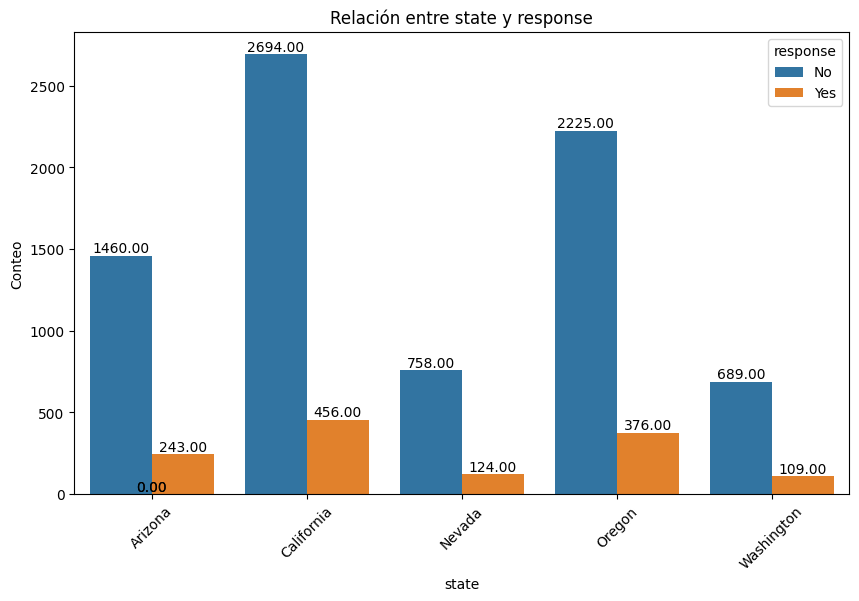

In [3]:
plot_categorical_relationship_fin(df_seguros, "state","response", show_values= True)

Parece que sí, que las respuestas se distribuyen igual independientemente del estado, pero sería mejor verlo con algunos números quizás, y además no en frecuencia absoluta sino en relativa. Juguemos con nuestra función:


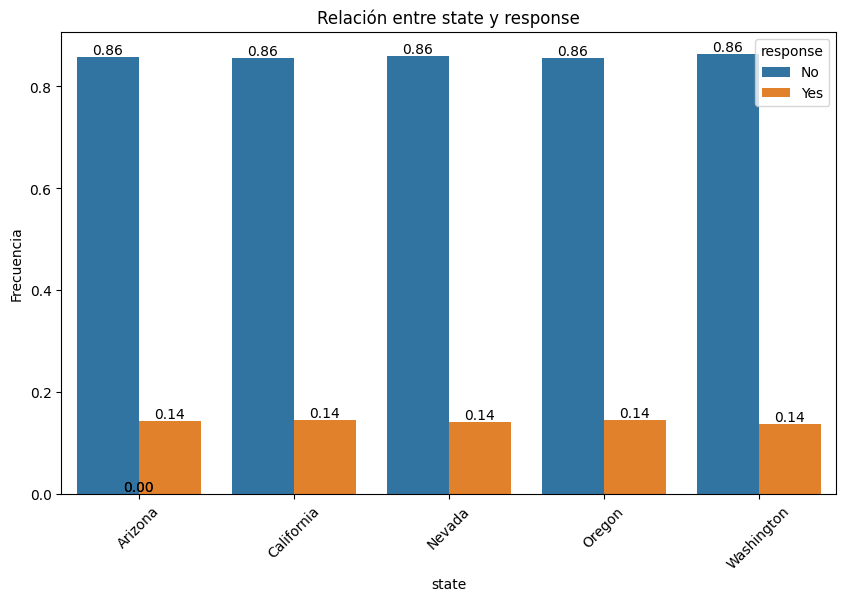

In [4]:
plot_categorical_relationship_fin(df_seguros, "state","response", relative_freq = True, show_values = True)

Pues guau, está claro que no hay relación entre una y otra (clava en cada estado la medida general). Esto ya sí es un buen resultado para mi análisis, si quiero mejorar la respuesta de mis campañas no hay un estado que me sirva de ejemplo, pero también me dice que no es algo que dependa del lugar de residencia de mis clientes. 

In [5]:
# En números, por si no te crees el gráfico
df_seguros.groupby("state", as_index = False)["response"].value_counts(normalize = True)

,state,response,proportion
0,Arizona,No,0.857311
1,Arizona,Yes,0.142689
2,California,No,0.855238
3,California,Yes,0.144762
4,Nevada,No,0.859410
5,Nevada,Yes,0.140590
6,Oregon,No,0.855440
7,Oregon,Yes,0.144560
8,Washington,No,0.863409
9,Washington,Yes,0.136591


Ahora sería el momento de seguir aplicándolo al resto de categóricas demográficas. Y luego con las otras que nos pidieron ver si había relación por ejemplo con el tipo de oferta. Vamos a ver esa antes de pasar al caso de los viajes.

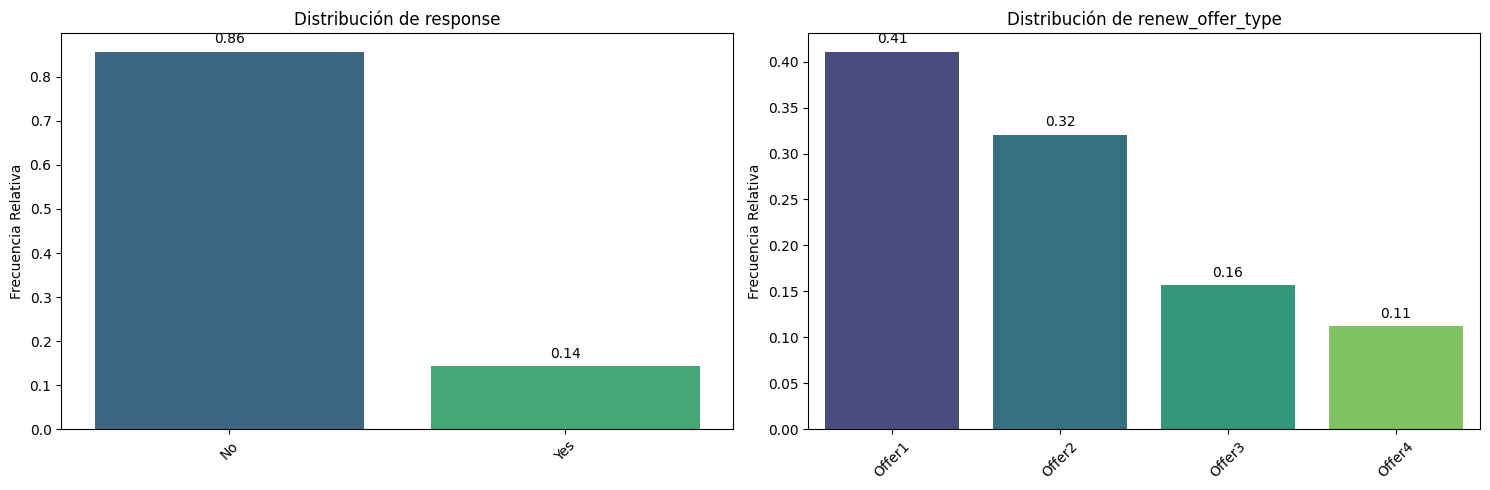

In [6]:
pinta_distribucion_categoricas(df_seguros,["response","renew_offer_type"], relativa= True, mostrar_valores= True)

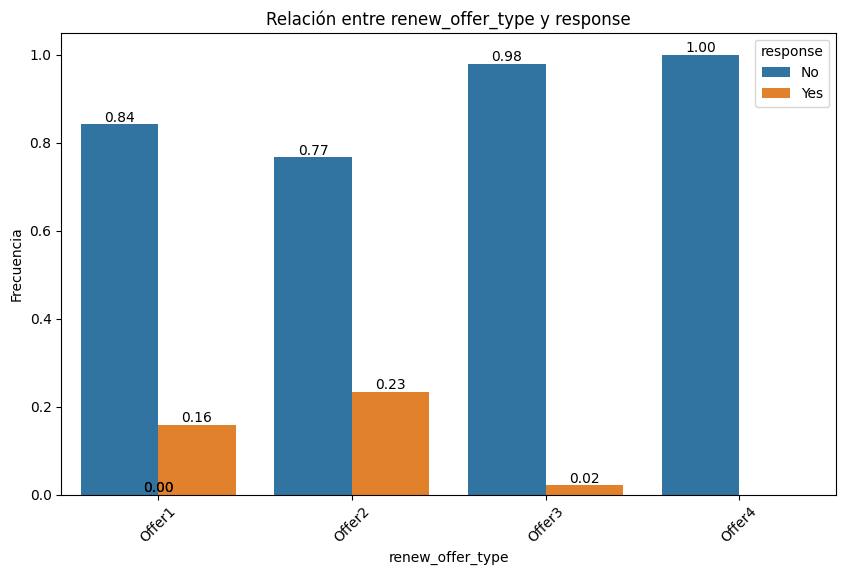

In [7]:
plot_categorical_relationship_fin(df_seguros, "renew_offer_type","response", relative_freq = True, show_values = True)

Aquí la cosa cambia y cuánto. Hay bastante que cortar aquí:
* La oferta1 tiene la tasa similar a la global y además parece que arrastra al resto por eso porque es esa tasa global.
* La oferta2 es claramente una gran oferta en terminos comparativos. ¿Podríamos hacer la oferta 2 todo el tiempo? ¿Qué beneficio tiene?¿Está dirigida a todo el público? (Salen más preguntas, pero porque este hallazgo es interesante)
* Las ofertas 3 y 4 probablemente habría que desecharlas o bien remodelarlas completamente.

### Caso 2. Viajes: Bivariante aircompany-destino

Pues directo al grano:

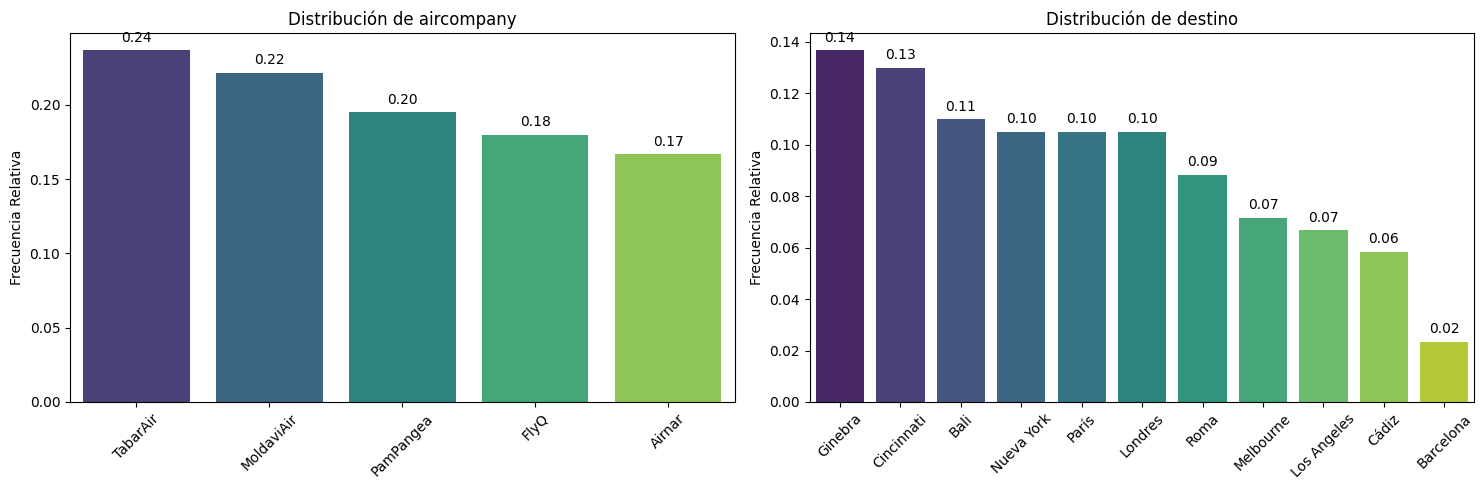

In [8]:
pinta_distribucion_categoricas(df_air_jun,["aircompany","destino"], relativa= True, mostrar_valores= True)

Considero Aircompany como la variable directora, porque en realidad desde Tabarair lo que estamos haciendo es una análisis competitivo, si lo pensamos un poco:

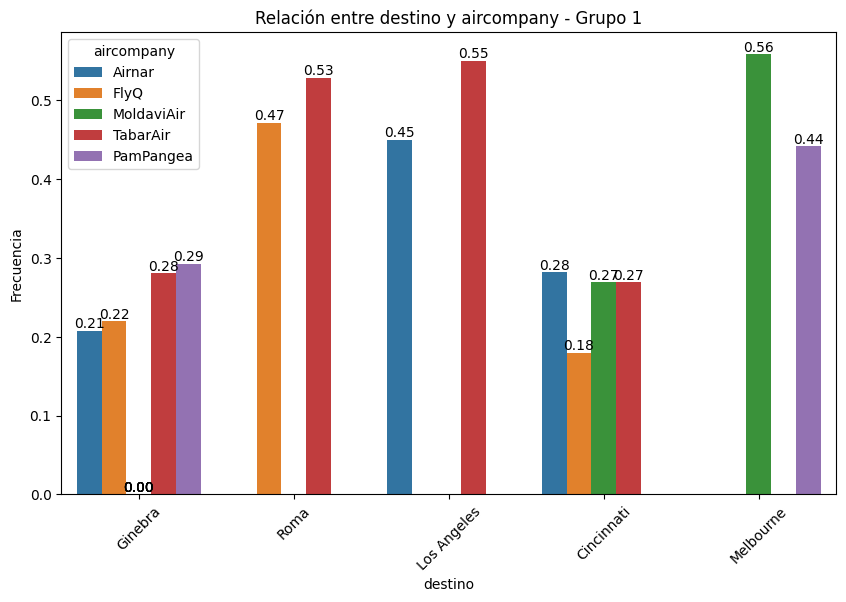

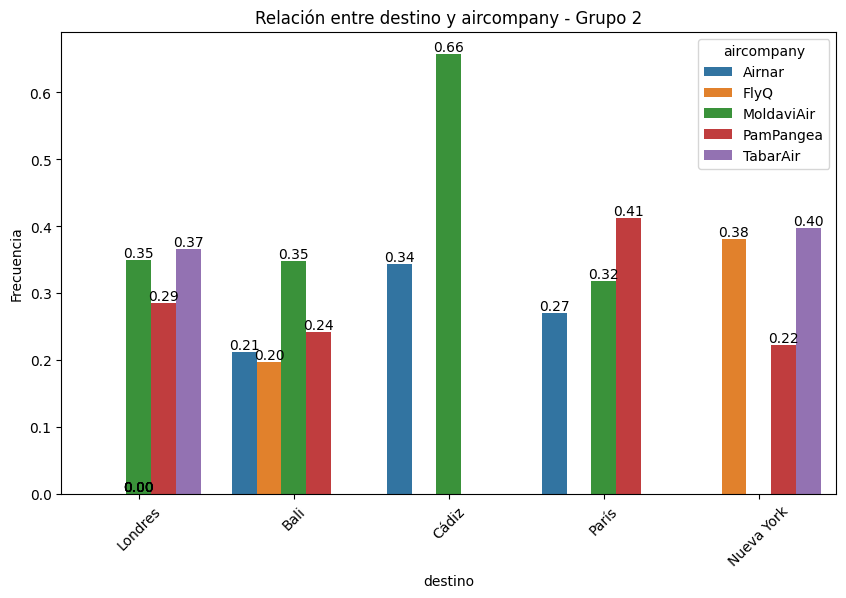

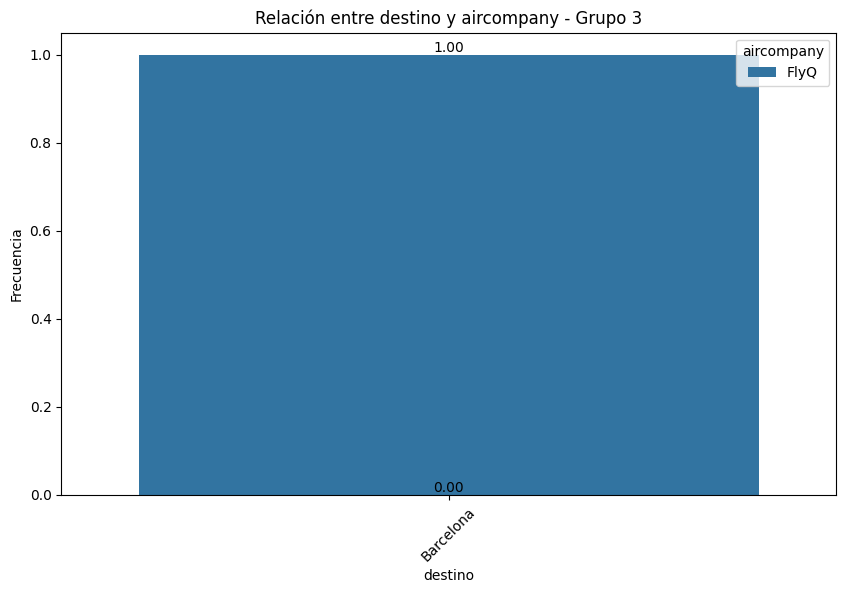

In [9]:
plot_categorical_relationship_fin(df_air_jun, "destino","aircompany", relative_freq = True, show_values = True)

Aunque es mucha información seguro que ya has visto por lo menos un punto interesante, vamos que sobresale y que indica que por lo menos deberíamos prestarle interés:
* A Barcelona solo vuelta FlyQ y si recuerdas Barcelona era un destino infraservido (era el destino con menos viajes), esto pinta a que tenemos otra pequeña perla: Hay que estudiar Barcelona, porque podría ser perfectamente un lugar de expansión.LookupError
* Cádiz, era el siguiente sitio infraservido y sólo hay dos compañías, podría ser también otro punto.
* Por otro lado se explica que Bali, Cincinnati y Ginebra sean las ciudades con más vuelos. Son las únicas con 4 compañías operando en ellas. Tabarair opera en dos de ellas. Quizá sea el momento de reducir los vuelos en esas ciuidades y aumentarlos en Barcelona, ¿se te ocurre como profundizar en esta hipótesis? (sin duda para mí esta sería una buena guía de trabajo para el análisis de estos datos)

### Siguientes Pasos

Pues ya has visto un ejemplo y una guía de como trabajar relaciones entre dos variables categóricas. Este estudio lo completaremos cuando estudiemos la correlación entre vairables categóricas. Ahora te dejo unos posibles pasos para enfrentarse al análisis bivarainte de variables categóricas:

1. Empieza por las categóricas directoras y comparalas con el resto de categóricas dos a dos.
2. Para ello muestra sus valores frecuenciales por separado.
3. Luego muestra sus valores frecuenciales combinados.
4. Analiza y aumenta tu saca de preguntas pero también empezarán los pequeñas perlas del análisis a aparecer.
